# Code for Producing Figure 4

### From the paper:  
**"Fractal clusters and urban scaling shape spatial inequality in U.S. patenting"**, published in npj Complexity,  https://doi.org/10.1038/s44260-025-00054-y

**Authors:**  
Salva Duran-Nebreda, Blai Vidiella,  R. Alexander Bentley and Sergi Valverde

**Date:** September 8, 2025  
**Location:** Barcelona  
**Group:** Evolution of Networks Lab |  https://svalver.github.io  
**E-mail:** svalver@gmail.com

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [ ]:
# Loading A and C data 

# The shape file was generated from the clustering tree using the A and C definitions in
# (see Herrada, E. A. et al. (2000) Universal scaling in the branching of the tree of life. PLoS ONE 3, e2757)
data = pd.read_csv("shape_tree.csv", sep="\t", header=None, names=["A", "C"])
A = data["A"].to_numpy()
C = data["C"].to_numpy()

# Display the loaded data
print("Subtree Sizes (A):", A)
print("Cumulative Branch Sizes (C):", C)

Subtree Sizes (A): [   1    1    1 ... 1767 1769 2610]
Cumulative Branch Sizes (C): [    1     1     1 ... 73107 74877 96617]


In [16]:
def power_law(x, a, b):
    return a * x**b

def ccdf_power_law(x, a, b):
    return a * x**(-b)

# CCDFs
F_A = np.array([np.sum(A >= a) / len(A) for a in np.sort(A)])
F_C = np.array([np.sum(C >= c) / len(C) for c in np.sort(C)])

# Sort values for fitting
sorted_A = np.sort(A)
sorted_C = np.sort(C)

# Fit power law to F_A and F_C
params_F_A, _ = curve_fit(ccdf_power_law, sorted_A[sorted_A > 1], F_A[sorted_A > 1])
params_F_C, _ = curve_fit(ccdf_power_law, sorted_C[sorted_C > 1], F_C[sorted_C > 1])

# Extract exponents
alpha_A = params_F_A[1]
alpha_C = params_F_C[1]

print(f"F(A) Exponent: {alpha_A:.2f}")
print(f"F(C) Exponent: {alpha_C:.2f}")


# Filter data to only include A in the range (1, 200)
mask = (A > 0) & (A < 200)
A_filtered = A[mask]
C_filtered = C[mask]

# Define the power-law function C ~ A^nu
def power_law(x, a, b):
    return a * x**b

# Perform the fit on the filtered range
popt, _ = curve_fit(power_law, A_filtered, C_filtered)
a, nu = popt

F(A) Exponent: 0.60
F(C) Exponent: 0.40


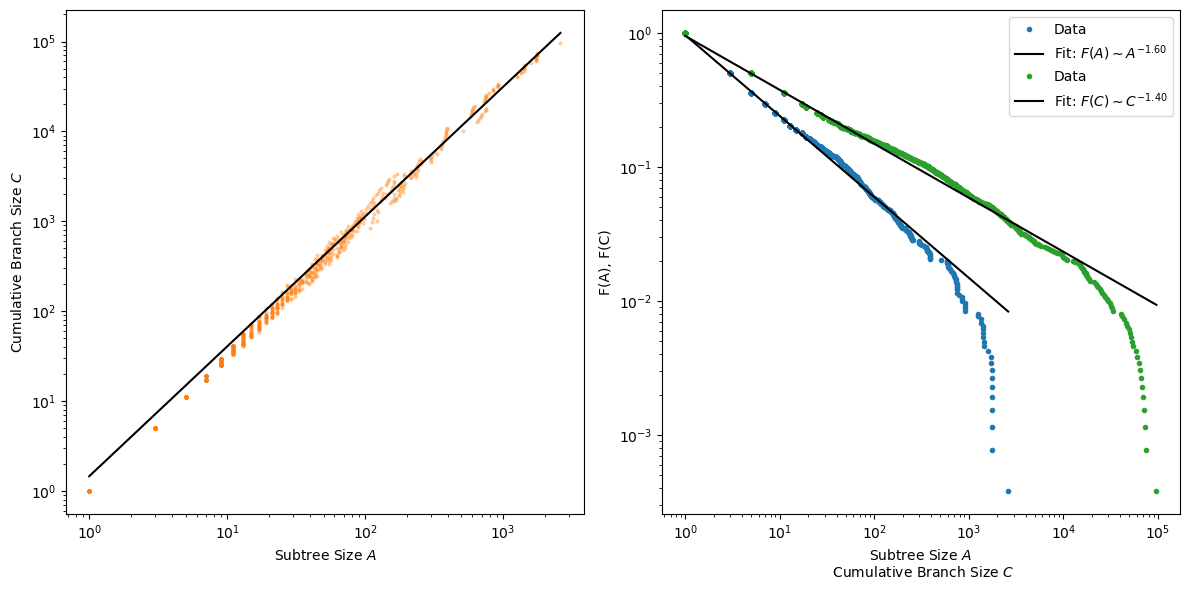

In [17]:
# Plot results
plt.figure(figsize=(12, 6))

# --- First subplot ---
plt.subplot(1, 2, 1)
plt.scatter(A, C, alpha=0.3, label='Data', s=4, color="tab:orange")

A_fit = np.linspace(min(A), max(A), 100)
C_fit = power_law(A_fit, a, nu)

# Fitted line
plt.loglog(A_fit, C_fit, label=fr'Fit: $C \sim A^{{-{nu:.2f}}}$', color='black')
plt.xlabel('Subtree Size $A$', fontsize=10)
plt.ylabel('Cumulative Branch Size $C$', fontsize=10)
# plt.legend()

# --- Second subplot ---
plt.subplot(1, 2, 2)
plt.loglog(sorted_A, F_A, 'o', label='Data', markersize=3, color="tab:blue")
plt.loglog(sorted_A, ccdf_power_law(sorted_A, *params_F_A),
           label=fr'Fit: $F(A) \sim A^{{-{1+alpha_A:.2f}}}$', color='black')

plt.loglog(sorted_C, F_C, 'o', label='Data', markersize=3, color="tab:green")
plt.loglog(sorted_C, ccdf_power_law(sorted_C, *params_F_C),
           label=fr'Fit: $F(C) \sim C^{{-{1+alpha_C:.2f}}}$', color='black')

plt.xlabel('Subtree Size $A$ \n Cumulative Branch Size $C$', fontsize=10)
plt.ylabel('F(A), F(C)')
plt.xticks([1, 10, 100, 1000, 10000, 100000])
plt.legend()
plt.tight_layout()
plt.show()

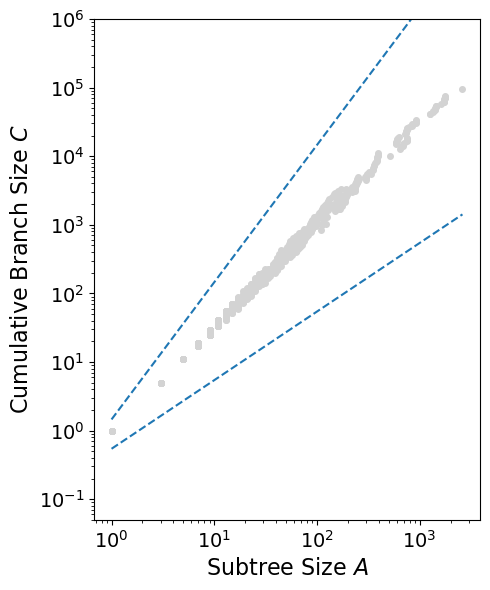

In [18]:
def unbalanced_tree(x, a):
    return a * x * np.log(a)

# Prepare the plot  
fig, ax = plt.subplots(figsize=(5, 6))

# Change the fontsize of tick labels
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

plt.loglog(A, C, 'o', alpha=1, label='Data', color="lightgray", markersize=4)

A_fit = np.linspace(min(A), max(A), 100)
C_fit = power_law(A_fit, a, nu)

# Fitted alternatives
# plt.loglog(A_fit, C_fit, label=fr'Fit: $C \sim A^{{-{nu:.2f}}}$', color='black')
plt.loglog(A_fit, unbalanced_tree(A_fit, a), '--', 
           label=r'$C \sim A \ln A$', color='tab:blue')
plt.loglog(A_fit, power_law(A_fit, a, 2), '--', 
           label=r'$C \sim A^2$', color='tab:blue')

plt.xlabel('Subtree Size $A$', fontsize=16)
plt.ylabel('Cumulative Branch Size $C$', fontsize=16)
plt.ylim(0.05, 10**6)

# plt.legend()
plt.tight_layout()
plt.savefig("scaling_ca.svg")

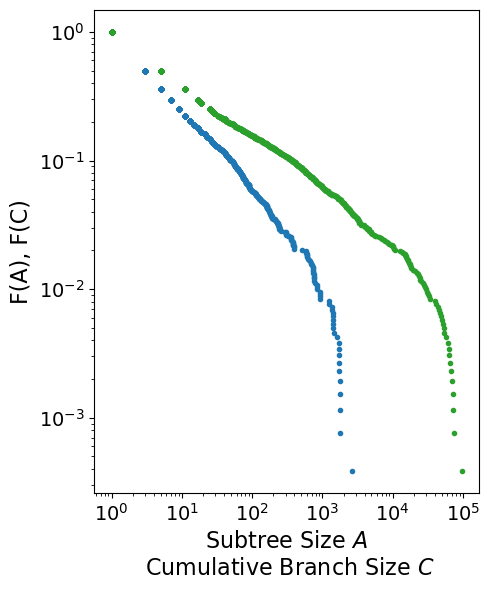

In [19]:
fig, ax = plt.subplots(figsize=(5,6))
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
# Plot CCDFs
plt.loglog(sorted_A, F_A, 'o', label='Data', markersize=3, color = "tab:blue")
# plt.loglog(sorted_A, ccdf_power_law(sorted_A, *params_F_A), label=f'Fit: $F(A) \sim A^{{-{1+alpha_A:.2f}}}$', color ='black')
# plt.xlabel('Subtree Size $A$',  fontsize=9)
# plt.legend()

plt.loglog(sorted_C, F_C, 'o', label='Data', markersize=3, color ="tab:green")
# plt.loglog(sorted_C, ccdf_power_law(sorted_C, *params_F_C), label=f'Fit: $F(C) \sim C^{{-{1+alpha_C:.2f}}}$', color ='black')
plt.xlabel('Subtree Size $A$ \n Cumulative Branch Size $C$', fontsize=16)
plt.ylabel('F(A), F(C)', fontsize =16)
plt.xticks ([1, 10,100,1000,10000, 100000])
# plt.legend()
plt.tight_layout()
plt.savefig ("scaling_ccdf.svg")
